### BLIP-2: Bridging the Vision-Language Gap

- BLIP-2 (Bootstrapping Language-Image Pre-training for Unified Vision-Language Understanding and Generation 2)

In [2]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration

blip_processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b",torch_dtype=torch.float16)
model.to(device)

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/882 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

Blip2ForConditionalGeneration(
  (vision_model): Blip2VisionModel(
    (embeddings): Blip2VisionEmbeddings(
      (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
    )
    (encoder): Blip2Encoder(
      (layers): ModuleList(
        (0-38): 39 x Blip2EncoderLayer(
          (self_attn): Blip2Attention(
            (qkv): Linear(in_features=1408, out_features=4224, bias=True)
            (projection): Linear(in_features=1408, out_features=1408, bias=True)
          )
          (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
          (mlp): Blip2MLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=1408, out_features=6144, bias=True)
            (fc2): Linear(in_features=6144, out_features=1408, bias=True)
          )
          (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
  )
  (qf

In [4]:
model.vision_model

Blip2VisionModel(
  (embeddings): Blip2VisionEmbeddings(
    (patch_embedding): Conv2d(3, 1408, kernel_size=(14, 14), stride=(14, 14))
  )
  (encoder): Blip2Encoder(
    (layers): ModuleList(
      (0-38): 39 x Blip2EncoderLayer(
        (self_attn): Blip2Attention(
          (qkv): Linear(in_features=1408, out_features=4224, bias=True)
          (projection): Linear(in_features=1408, out_features=1408, bias=True)
        )
        (layer_norm1): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
        (mlp): Blip2MLP(
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1408, out_features=6144, bias=True)
          (fc2): Linear(in_features=6144, out_features=1408, bias=True)
        )
        (layer_norm2): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
      )
    )
  )
  (post_layernorm): LayerNorm((1408,), eps=1e-06, elementwise_affine=True)
)

In [5]:
model.language_model

OPTForCausalLM(
  (model): OPTModel(
    (decoder): OPTDecoder(
      (embed_tokens): Embedding(50304, 2560, padding_idx=1)
      (embed_positions): OPTLearnedPositionalEmbedding(2050, 2560)
      (final_layer_norm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
      (layers): ModuleList(
        (0-31): 32 x OPTDecoderLayer(
          (self_attn): OPTAttention(
            (k_proj): Linear(in_features=2560, out_features=2560, bias=True)
            (v_proj): Linear(in_features=2560, out_features=2560, bias=True)
            (q_proj): Linear(in_features=2560, out_features=2560, bias=True)
            (out_proj): Linear(in_features=2560, out_features=2560, bias=True)
          )
          (activation_fn): ReLU()
          (self_attn_layer_norm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
          (fc1): Linear(in_features=2560, out_features=10240, bias=True)
          (fc2): Linear(in_features=10240, out_features=2560, bias=True)
          (final_layer_norm): Laye

#### Preprocessing Image

In [15]:
from PIL import Image

car_img_path = "./images/car_image.avif"

image = Image.open(car_img_path).convert("RGB")
image.size

(687, 1031)

In [16]:
# preprocess the image

inputs = blip_processor(image,return_tensors="pt").to(device,torch.float16)
inputs['pixel_values'].shape

torch.Size([1, 3, 224, 224])

In [17]:
inputs['pixel_values']

tensor([[[[ 1.7842,  1.8281,  0.8354,  ...,  1.9014,  1.9014,  1.7988],
          [ 1.8135,  1.7988,  0.7627,  ...,  1.9014,  1.9014,  1.7988],
          [ 1.9307,  1.9307,  1.0547,  ...,  1.9160,  1.9160,  1.7988],
          ...,
          [-0.1135, -0.2595, -0.4055,  ...,  0.2369,  0.2223,  0.2078],
          [ 0.1348,  0.0471, -0.0551,  ...,  0.3684,  0.3684,  0.3684],
          [ 0.3828,  0.3828,  0.3684,  ...,  0.4268,  0.3975,  0.3828]],

         [[ 1.9697,  2.0000,  1.0996,  ...,  2.0449,  2.0449,  1.9395],
          [ 1.9697,  1.9697,  0.9941,  ...,  2.0449,  2.0449,  1.9395],
          [ 2.0742,  2.0742,  1.2646,  ...,  2.0605,  2.0605,  1.9395],
          ...,
          [-0.1613, -0.2964, -0.4165,  ...,  0.3191,  0.3040,  0.2891],
          [ 0.0488, -0.0262, -0.1013,  ...,  0.4390,  0.4241,  0.4390],
          [ 0.2289,  0.2289,  0.2139,  ...,  0.4690,  0.4390,  0.4390]],

         [[ 2.0176,  2.0605,  1.4062,  ...,  2.1172,  2.1172,  2.0176],
          [ 2.0176,  2.0605,  

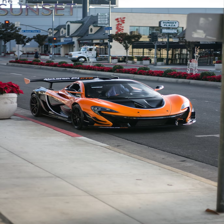

In [23]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# convert to numpy and go from (1,3,244,244) to (244,244,3) in shape

image_inputs = inputs['pixel_values'][0].detach().cpu().numpy()
image_inputs = np.transpose(image_inputs, (1, 2, 0))

# scale image inputs to 0 to 255 to represent RGB values

scalar = MinMaxScaler(feature_range=(0, 255))
image_inputs = scalar.fit_transform(image_inputs.reshape(-1, image_inputs.shape[-1])).reshape(image_inputs.shape)
image_inputs = np.array(image_inputs,dtype=np.uint8)

Image.fromarray(image_inputs)

array([[[244, 248, 246],
        [248, 250, 249],
        [178, 190, 203],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [245, 246, 246]],

       [[246, 248, 246],
        [245, 248, 249],
        [173, 183, 197],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [245, 246, 246]],

       [[255, 255, 252],
        [255, 255, 255],
        [193, 201, 213],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [245, 246, 246]],

       ...,

       [[112, 106,  96],
        [102,  97,  89],
        [ 91,  89,  83],
        ...,
        [136, 138, 136],
        [135, 137, 135],
        [134, 136, 134]],

       [[129, 120, 105],
        [123, 115, 101],
        [116, 110,  97],
        ...,
        [146, 146, 143],
        [146, 145, 142],
        [146, 146, 142]],

       [[147, 132, 116],
        [147, 132, 116],
        [146, 131, 115],
        ...,
        [150, 148, 145],
        [148, 146, 142],
        [147, 146, 141]]], dtype=uint8)
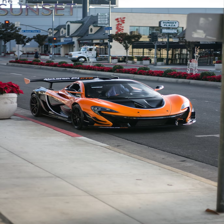

In [24]:
image_inputs

#### Processing Text

In [25]:
text = "This is a racing car."
token_ids = blip_processor(text=text, return_tensors="pt").to(device,torch.float16)
token_ids = token_ids['input_ids'][0]
token_ids

tensor([   2,  713,   16,   10, 4930,  512,    4], device='cuda:0')

In [35]:
tokens = blip_processor.tokenizer.convert_ids_to_tokens(token_ids)
tokens

['</s>', 'This', 'Ġis', 'Ġa', 'Ġracing', 'Ġcar', '.']

In [36]:
tokens = [token.replace("Ġ","_") for token in tokens]
tokens

['</s>', 'This', '_is', '_a', '_racing', '_car', '.']

#### Use Case 1: Image Captioning

In [37]:
generated_ids = model.generate(**inputs,max_new_tokens=120)
generated_ids

tensor([[50265, 50265, 50265, 50265, 50265, 50265, 50265, 50265, 50265, 50265,
         50265, 50265, 50265, 50265, 50265, 50265, 50265, 50265, 50265, 50265,
         50265, 50265, 50265, 50265, 50265, 50265, 50265, 50265, 50265, 50265,
         50265, 50265,     2,   260,  8978,     8,   909,   475,  3998,  9475,
          1612,   512,    16,  9181,    15,     5,  2014, 50118]],
       device='cuda:0')

In [38]:
generated_text = blip_processor.batch_decode(generated_ids,skip_special_tokens=True)[0].strip()
generated_text

'an orange and black mclaren sports car is parked on the street'

### Use Case 2: Visual Question Answering

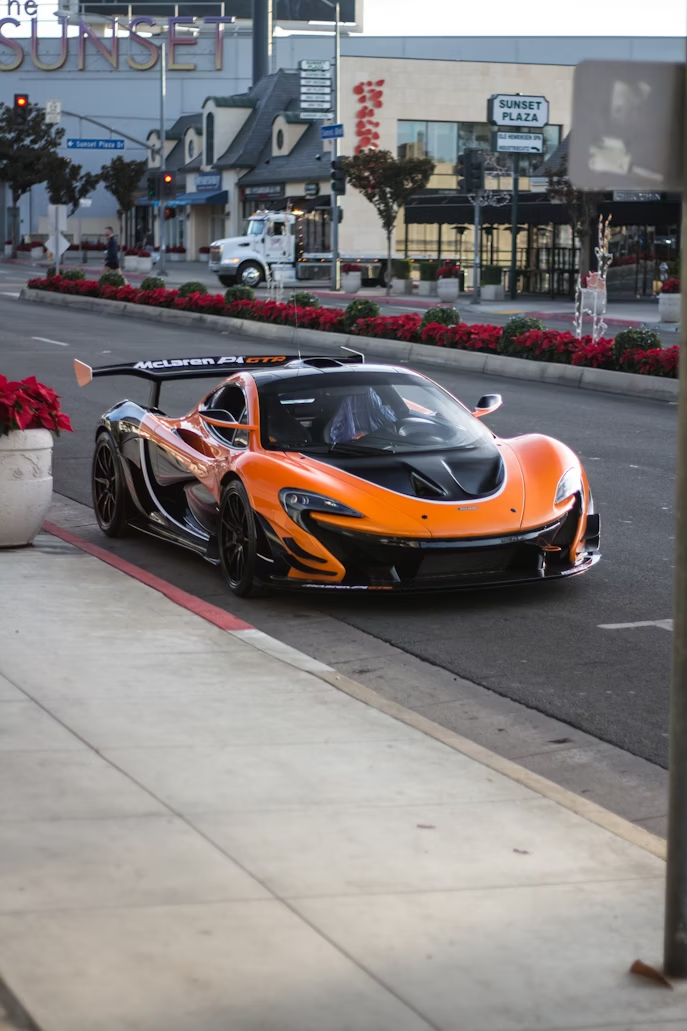

In [44]:
image

In [46]:
prompt = "Question: Write down what you see in the picture? Answer:"

inputs = blip_processor(images=image,text=prompt,return_tensors="pt").to(device,torch.float16)

generated_ids = model.generate(**inputs,max_new_tokens=120)
generated_text = blip_processor.batch_decode(generated_ids,skip_special_tokens=True)[0].strip()
generated_text

'Question: Write down what you see in the picture? Answer: mclaren p1'

In [47]:
prompt = "Question: Write down what you see in the picture? Answer: mclaren p1. Question: What would be the cost of this car? Answer:"

inputs = blip_processor(images=image,text=prompt,return_tensors="pt").to(device,torch.float16)

generated_ids = model.generate(**inputs,max_new_tokens=120)
generated_text = blip_processor.batch_decode(generated_ids,skip_special_tokens=True)[0].strip()
generated_text

'Question: Write down what you see in the picture? Answer: mclaren p1. Question: What would be the cost of this car? Answer: $1,000,000'